<h1 style="text-align:center">Mid-Term 1 Solutions</h1>
<h3 style="text-align:center">MCHE 513: Intermediate Dynamics &mdash; Fall 2018</h3> 
<p style="text-align:center">Dr. Joshua Vaughan <br>
<a href="mailto:joshua.vaughan@louisiana.edu">joshua.vaughan@louisiana.edu</a><br>
<a href="http://www.ucs.louisiana.edu/~jev9637/">http://www.ucs.louisiana.edu/~jev9637/</a></p>

In [1]:
# We'll first import the necessary modules from SymPy
# Import the SymPy Module
import sympy

# Import the necessary sub-modules for kinematics
# from sympy.vector import express

# Import the necessary sub-modules and methods for dynamics
from sympy.physics.mechanics import dynamicsymbols
from sympy.physics.mechanics import inertia, Point, RigidBody, ReferenceFrame
from sympy.physics.mechanics import linear_momentum, angular_momentum

# initiate better printing of SymPy results
sympy.init_printing()

## Problem 1
In Figure 1, a disk of radius $R$ spins about link BC at a rate of $\dot{\phi}$. Link ABC rotates about axis $Z$ at a constant rate, $\dot{\psi}$. The angle from link AB from vertical, $\theta$, is also variable. The angle of the bend in the ABC linkage, $\beta$, is fixed.

  a. Write the angular velocity and angular acceleration of the disk. For each, be sure to indicate how to resolve all the components into the same frame.    

  b. What is the velocity of point D?

  c. What is the acceleration of point D?
  
<p style="text-align:center">
	<img src="http://shared.crawlab.org/disk_on_bent_rod.png" alt="A Spinning disk on a Bent Linkage" width=50%><br>
    <strong>Figure 1: A Spinning disk on a Bent Linkage</strong>
</p>

### Part a.

In [2]:
# Define the genearlized coordinates and other dynamic symbols
psi, theta, phi = dynamicsymbols('Psi theta phi')

# Also define the first derivatives
psi_dot, theta_dot, phi_dot = dynamicsymbols('Psi theta phi', 1)

# Define the symbols for the other paramters
L1, L2, R, beta = sympy.symbols('L_1 L_2 R beta')

In [3]:
# Define the Newtonian reference frame
N = ReferenceFrame('N')

# Define a body-fixed frame along AB, but with Y parallel to the ground
XYZ = N.orientnew('XYZ', 'Axis', [psi, N.z])

# Define a new frame relative to the last, such that its z-axis is along AB 
prime = XYZ.orientnew('prime', 'Axis', [theta, XYZ.y])

# Finally, define the last frame such that its z-axis is aligned with BC
xyz = prime.orientnew('xyz', 'Axis', [beta, prime.y])

We can now easily get the rotaion matrices between these frames.

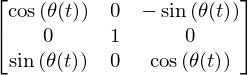

In [4]:
# The rotation matrix from XYZ to x'y'z'
R_theta = prime.dcm(XYZ)
R_theta

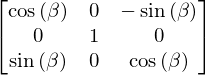

In [5]:
# The rotation matrix from x'y'z' to xyz
R_beta = xyz.dcm(prime)
R_beta

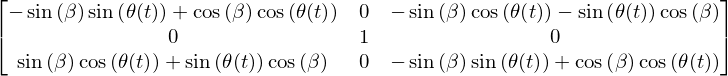

In [6]:
# The total rotation matrix from XYZ to xyz = R_beta*R_theta
R_total = xyz.dcm(XYZ)
R_total

In [7]:
# Define a body-fixed frame on the disk and use it to set the angular velocity
w_disk = ReferenceFrame('w_disk')

# Express the angular velocity in the "easiest" coordinate frame to do so
w_disk.set_ang_vel(N, psi_dot * N.z + theta_dot * XYZ.y + phi_dot * xyz.z)

Then, we can express it in the frame of our chosing, using the `.express(frame)` method on the resulting vector.

In [8]:
# Either XYZ
w_disk.ang_vel_in(N).express(XYZ)

In [9]:
# or xyz
w_disk.ang_vel_in(N).express(xyz)

Once we've properly defined the angular velocity and motion variables, we can get the angular acceleration using the `.ang_acc_in()` method on the frame (or body) of interest. 

In [10]:
w_disk.ang_acc_in(N)

As with the angular velocity, we can express it in any frame we like using the `.express(frame)` method on the resulting vector.

In [11]:
# Express in the XYZ frame
w_disk.ang_acc_in(N).express(XYZ)

In [12]:
# or the xyz frame
w_disk.ang_acc_in(N).express(xyz)

### Part b.

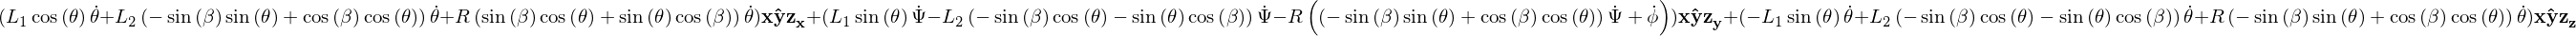

In [13]:
# Define point A and its velocity
A = Point('A')
A.set_vel(N, 0 * N.x)

# Define point B and set its velocity. Locate it relative to A
B = A.locatenew('B', L1 * prime.z)
B.v2pt_theory(A, N, prime)

# Define point C and set its velocity. Locate it relative to C
C = B.locatenew('C', L2 * xyz.z)
C.v2pt_theory(B, N, xyz)

# Finally, we can define point D, locate it relative to C, get its velocity, and express it in the XYZ frame
D = C.locatenew('D', -R * xyz.x)
D.v2pt_theory(C, N, w_disk).express(XYZ)

### Part c.

Once we have the velocity (and if we have define the motion variables properly), the acceleration is easy to get. As before, we can express it in any frame of our choosing.

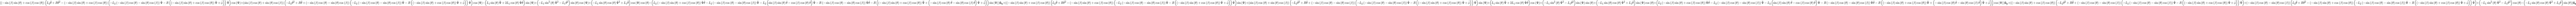

In [14]:
# In the fixed frame
D.acc(N).express(N)

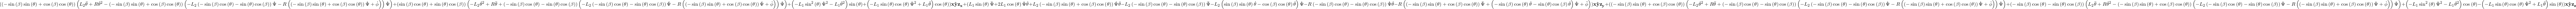

In [15]:
# In the XYZ frame
D.acc(N).express(XYZ)

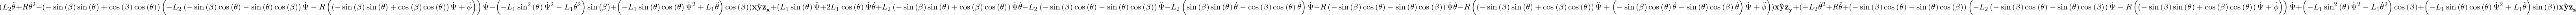

In [16]:
# Or in the xyz frame
D.acc(N).express(xyz)

## Problem 2
Figure 2 shows an instantaneous view of a disk rotating at a rate $\omega_2$ about point Q. An ant is relaxing on the disk (*i.e.* its location on the disk is fixed) at a distance $R$ from its center. When, $\theta = 0$, the ant reaches her topmost position. The center of the disk is located on the T-bar at a distance $L$ from the axis about which the bar is spinning, $Z$. The rate of rotation of the T-bar is described by $\omega_1$. 

a. What is the velocity of the ant, $\bar{v}_A$?

b. What is the acceleration of the ant, $\bar{a}_A$?

c. What does the ant observe as the velocity and acceleration of point P, the top of the T-bar?

<p style="text-align:center">
	<img src="http://shared.crawlab.org/disk_on_Tbar.png" alt="An Ant Riding on a Spinning Disk on a T-bar" width=50%><br>
    <strong>Figure 2: An Ant Riding on a Spinning Disk on a T-bar</strong>
</p>


In [17]:
# Define the genearlized coordinates and other dynamic symbols
theta_1, theta = dynamicsymbols('theta_1 theta')

# Also define the first derivatives
w1, w2 = dynamicsymbols('theta_1 theta', 1)

# Define the symbols for the other paramters
L, R = sympy.symbols('L R')

In [18]:
# Define the Newtonian reference frame
N = ReferenceFrame('N')

# Define a body-fixed frame to the T-bar
prime = N.orientnew('prime', 'Axis', [theta_1, N.z])

# Finally, define the last frame such that its z-axis is aligned with BC
xyz = prime.orientnew('xyz', 'Axis', [theta, prime.y])

### Part a.

In [19]:
# Define point A and its velocity
O = Point('O')
O.set_vel(N, 0 * N.x)

# Define point Q and set its velocity. Locate it relative to O
Q = O.locatenew('B', L * prime.x)
Q.v2pt_theory(O, N, prime)

# Define point A and set its velocity. Locate it relative to Q
A = Q.locatenew('Q', R * xyz.z)
A.v2pt_theory(Q, N, xyz)

# Now, we can express the velocity of the ant in any frame we chose. Here, we'll use the x'y'z' frame.
A.v2pt_theory(Q, N, xyz).express(prime)

### Part b.

Once we have the velocity (and if we have define the motion variables properly), the acceleration is easy to get. As before, we can express it in any frame of our choosing.

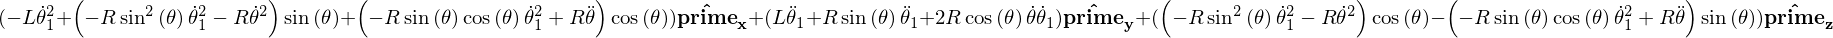

In [20]:
# In the x'y'z' frame
A.acc(N).express(prime)

## Problem 3
The sketch in Figure 3 shows a thin plate of mass, $m$, connected to a massless shaft. The corner of the plate is labeled as O, and the shaft-plate body rotates around $X$ at a constant rate, $\omega$. For this system:

a. Write the angular momentum about point O. You do *not* need to derive the inertial properties of the plate, but be sure properly identify what terms would be needed.

b. What moment must be applied at point O for this motion to occur?

<p style="text-align:center">
	<img src="http://shared.crawlab.org/rotating_plate.png" alt="A Rotating Thin Plate" width=50%><br>
    <strong>Figure 3: A Rotating Thin Plate</strong>
</p>

In [21]:
# Define the genearlized coordinate
theta = dynamicsymbols('theta')

# Also define the first derivative
theta_dot = dynamicsymbols('theta', 1)

# Define the symbols for the other paramters
m, L, Ixx, Iyy, Izz, Ixy, t = sympy.symbols('m L I_xx, I_yy, I_zz, I_xy t')

In [22]:
# Define the Newtonian reference frame
N = ReferenceFrame('N')

# Define the frame that is fixed to the plate
xyz = N.orientnew('xyz', 'Axis', [theta, N.x])

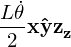

In [23]:
# Define the location of the points O and the plate COM
O = Point('O')
O.set_vel(N, 0 * N.x)

# Define point Q and set its velocity. Locate it relative to O
G = O.locatenew('G', L * xyz.x + L/2 * xyz.y)
G.v2pt_theory(O, N, xyz)

In [24]:
# Now, we need to define the rigid body element for the plate

# But first, we need to define its inertia properties
I = inertia(xyz, Ixx, Iyy, Izz, -Ixy)
plate = RigidBody('plate', G, xyz, m, (I, O))

In [25]:
angular_momentum(O, N, plate).simplify()

The sum of moments is just the total time derivative of this. In this case, we know that it is just 

$$ \quad \sum \bar{M}_O = \bar{\omega} \times \bar{H}_O $$

In [26]:
((theta_dot * N.x).cross(angular_momentum(O, N, plate))).simplify()

<hr style="border: 0px;
        height: 1px;
        text-align: center;
        background: #333;
        background-image: -webkit-linear-gradient(left, #ccc, #333, #ccc); 
        background-image:    -moz-linear-gradient(left, #ccc, #333, #ccc); 
        background-image:     -ms-linear-gradient(left, #ccc, #333, #ccc); 
        background-image:      -o-linear-gradient(left, #ccc, #333, #ccc);">

#### Licenses
Code is licensed under a 3-clause BSD style license. See the licenses/LICENSE.md file.

Other content is provided under a [Creative Commons Attribution-NonCommercial 4.0 International License](http://creativecommons.org/licenses/by-nc/4.0/), CC-BY-NC 4.0.

In [27]:
# This cell will just improve the styling of the notebook
# You can ignore it, if you are okay with the default sytling
from IPython.core.display import HTML
import urllib.request
response = urllib.request.urlopen("https://cl.ly/1B1y452Z1d35")
HTML(response.read().decode("utf-8"))